# 📚 Lifestyle Effects On Studies

Given *data of secondary school students* regarding their lifestyle, let's try to predict the **general average in mathematics** of a student.

# Getting Started

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv('../input/alcohol-effects-on-study/Maths.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [3]:
data['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

# Preprocessing

In [4]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Keep only features related to studies

    # Encode categorical features
    df = df.replace({'GP': 0, 'MS': 1})
    df = df.replace({'F': 0, 'M': 1})
    df = df.replace({'U': 0, 'R': 1})
    df = df.replace({'LE3': 0, 'GT3': 1})
    df = df.replace({'A': 0, 'T': 1})
    df = df.replace({'no': 0, 'yes': 1})
    
    # One-hot encode features
    onehot_features = ['Mjob', 'Fjob', 'reason', 'guardian']
    df = pd.concat([df, pd.get_dummies(df[onehot_features])], axis=1)
    df = df.drop(onehot_features, axis=1)
    
    # Average grade
    df['G'] = data[['G1', 'G2', 'G3']].mean(axis=1)
    df = df.drop(['G1', 'G2', 'G3'], axis=1)
    
    # Split X and y
    X = df.drop('G', axis=1)
    y = df['G']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=10)
    
    # Scale X
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
266,-0.375226,1.065427,0.192812,-0.543214,0.645787,0.329806,0.214969,-1.411129,-0.656726,-0.053915,-0.451477,-0.369717,-1.286648,1.065427,0.987421,0.494059,0.238445,0.438694,1.427747,1.257941,0.735577,0.798142,1.820543,1.354170,1.041115,-0.513565,-0.412759,-0.286691,-0.735842,1.661898,-0.438694,-0.23094,-0.19868,0.880500,-0.611484,-0.286691,-0.761577,-0.635959,3.271652,-0.591969,-0.538327,0.680414,-0.317876
352,2.665064,1.065427,0.964060,-0.543214,-1.548499,0.329806,-1.596500,0.435317,-0.656726,-1.270849,0.894435,-0.369717,-1.286648,-0.938591,-1.012739,0.494059,-4.193833,0.438694,1.427747,0.081878,-0.249348,-0.118996,0.629463,0.561730,-0.386184,0.195110,2.422719,-0.286691,-0.735842,-0.601722,-0.438694,-0.23094,-0.19868,-1.135718,1.635365,-0.286691,1.313064,-0.635959,-0.305656,-0.591969,-0.538327,0.680414,-0.317876
97,-0.375226,-0.938591,-0.578436,-0.543214,0.645787,0.329806,-0.690766,-1.411129,-0.656726,-0.053915,-0.451477,-0.369717,0.777214,1.065427,-1.012739,0.494059,0.238445,-2.279491,1.427747,0.081878,-0.249348,1.715279,-0.561617,-1.023151,1.041115,-0.513565,-0.412759,-0.286691,1.358987,-0.601722,-0.438694,-0.23094,-0.19868,0.880500,-0.611484,-0.286691,1.313064,-0.635959,-0.305656,-0.591969,-0.538327,0.680414,-0.317876
167,-0.375226,-0.938591,-0.578436,-0.543214,0.645787,0.329806,1.120703,-0.487906,-0.656726,-0.053915,-0.451477,-0.369717,-1.286648,1.065427,-1.012739,0.494059,0.238445,0.438694,1.427747,0.081878,-1.234274,-0.118996,-0.561617,-1.023151,-0.386184,-0.797034,-0.412759,3.488075,-0.735842,-0.601722,-0.438694,-0.23094,-0.19868,-1.135718,1.635365,-0.286691,-0.761577,1.572427,-0.305656,-0.591969,1.857607,-1.469694,-0.317876
280,-0.375226,1.065427,0.192812,-0.543214,-1.548499,-3.032086,1.120703,-1.411129,0.847081,-1.270849,-0.451477,-0.369717,-1.286648,1.065427,0.987421,0.494059,0.238445,0.438694,1.427747,0.081878,1.720503,0.798142,0.629463,1.354170,1.041115,3.455011,-0.412759,-0.286691,-0.735842,1.661898,-0.438694,-0.23094,-0.19868,0.880500,-0.611484,-0.286691,-0.761577,1.572427,-0.305656,-0.591969,-0.538327,0.680414,-0.317876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2.665064,-0.938591,0.964060,1.840894,0.645787,0.329806,1.120703,1.358540,2.350889,-0.053915,-0.451477,-0.369717,0.777214,1.065427,-1.012739,-2.024049,0.238445,0.438694,1.427747,-1.094185,-1.234274,-1.036133,3.011623,-0.230711,1.041115,0.620314,-0.412759,-0.286691,1.358987,-0.601722,-0.438694,-0.23094,-0.19868,-1.135718,-0.611484,3.488075,-0.761577,-0.635959,3.271652,-0.591969,1.857607,-1.469694,-0.317876
320,-0.375226,-0.938591,0.192812,-0.543214,0.645787,-3.032086,1.120703,0.435317,-0.656726,-0.053915,-0.451477,-0.369717,0.777214,1.065427,-1.012739,0.494059,0.238445,0.438694,1.427747,1.257941,-1.234274,-1.036133,-0.561617,-0.230711,1.041115,2.462867,-0.412759,-0.286691,-0.735842,1.661898,-0.438694,-0.23094,-0.19868,-1.135718,1.635365,-0.286691,1.313064,-0.635959,-0.305656,-0.591969,-0.538327,0.680414,-0.317876
15,-0.375226,-0.938591,-0.578436,-0.543214,0.645787,0.329806,1.120703,1.358540,-0.656726,-1.270849,-0.451477,-0.369717,0.777214,-0.938591,-1.012739,0.494059,0.238445,0.438694,-0.700404,0.081878,0.735577,0.798142,-0.561617,-0.230711,-1.099833,-0.230095,-0.412759,3.488075,-0.735842,-0.601722,-0.438694,-0.23094,-0.19868,0.880500,-0.611484,-0.286691,-0.761577,1.572427,-0.305656,-0.591969,-0.538327,0.680414,-0.317876
125,-0.375226,1.065427,-1.349684,-0.543214,0.645787,0.329806,0.214969,1.358540,-0.65

# Training

In [6]:
models = {
    "    Random Forest" : RandomForestRegressor(),
    "Gradient Boosting" : GradientBoostingRegressor(),
    "          XGBoost" : XGBRegressor(),
    "         LightGBM" : LGBMRegressor(),
    "         CatBoost" : CatBoostRegressor(verbose=0)
}

print("------- Training! -------")
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")
print("--------- Done! ---------")

------- Training! -------
    Random Forest trained.
Gradient Boosting trained.
          XGBoost trained.
         LightGBM trained.
         CatBoost trained.
--------- Done! ---------


# Results

In [7]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name + "  R2 Score: {:.4f}".format(r2_score(y_test, y_pred)))
    print("                                            RMSE: {:.2f}\n".format(np.sqrt(mean_squared_error(y_test, y_pred))))

    Random Forest  R2 Score: 0.2344
                                            RMSE: 2.95

Gradient Boosting  R2 Score: 0.1688
                                            RMSE: 3.07

          XGBoost  R2 Score: 0.0298
                                            RMSE: 3.32

         LightGBM  R2 Score: 0.1375
                                            RMSE: 3.13

         CatBoost  R2 Score: 0.2512
                                            RMSE: 2.92



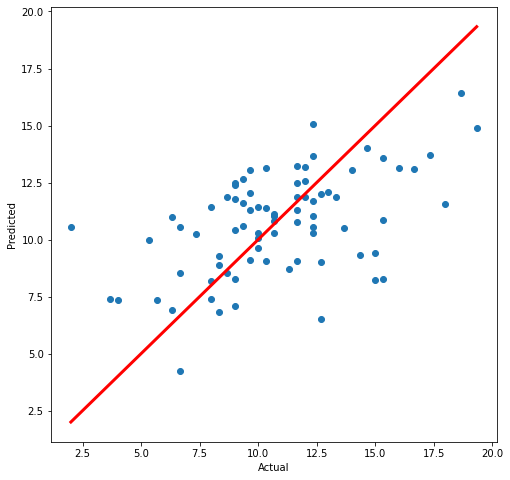

In [8]:
# CatBoostRegressor model
model = CatBoostRegressor(verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='r', lw=3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

The model is not able to make very good predictions. It shows the importance of having a decent quantity of data for the training. Here, we have less than 500 records which is very small. Also we could improve the preprocessing by creating new features or investigating the most important features, but it does not seem worth it right now given how little data we have.

**Thank you for reading, have a nice day!**